In [15]:
# 💎 Glass Classification ML Pipeline | Complete EDA to Reporting

In [16]:
# STEP 0: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [18]:
# STEP 1: Load Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
columns = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','GlassType']
df = pd.read_csv(url, names=columns)
df.drop('Id', axis=1, inplace=True)

print("📄 Dataset Preview:")
print(df.head())


📄 Dataset Preview:
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  GlassType
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0          1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0          1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0          1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0          1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0          1


In [19]:
# STEP 2: Check for Missing Values
print("\n🔍 Missing Values:")
print(df.isnull().sum())


🔍 Missing Values:
RI           0
Na           0
Mg           0
Al           0
Si           0
K            0
Ca           0
Ba           0
Fe           0
GlassType    0
dtype: int64


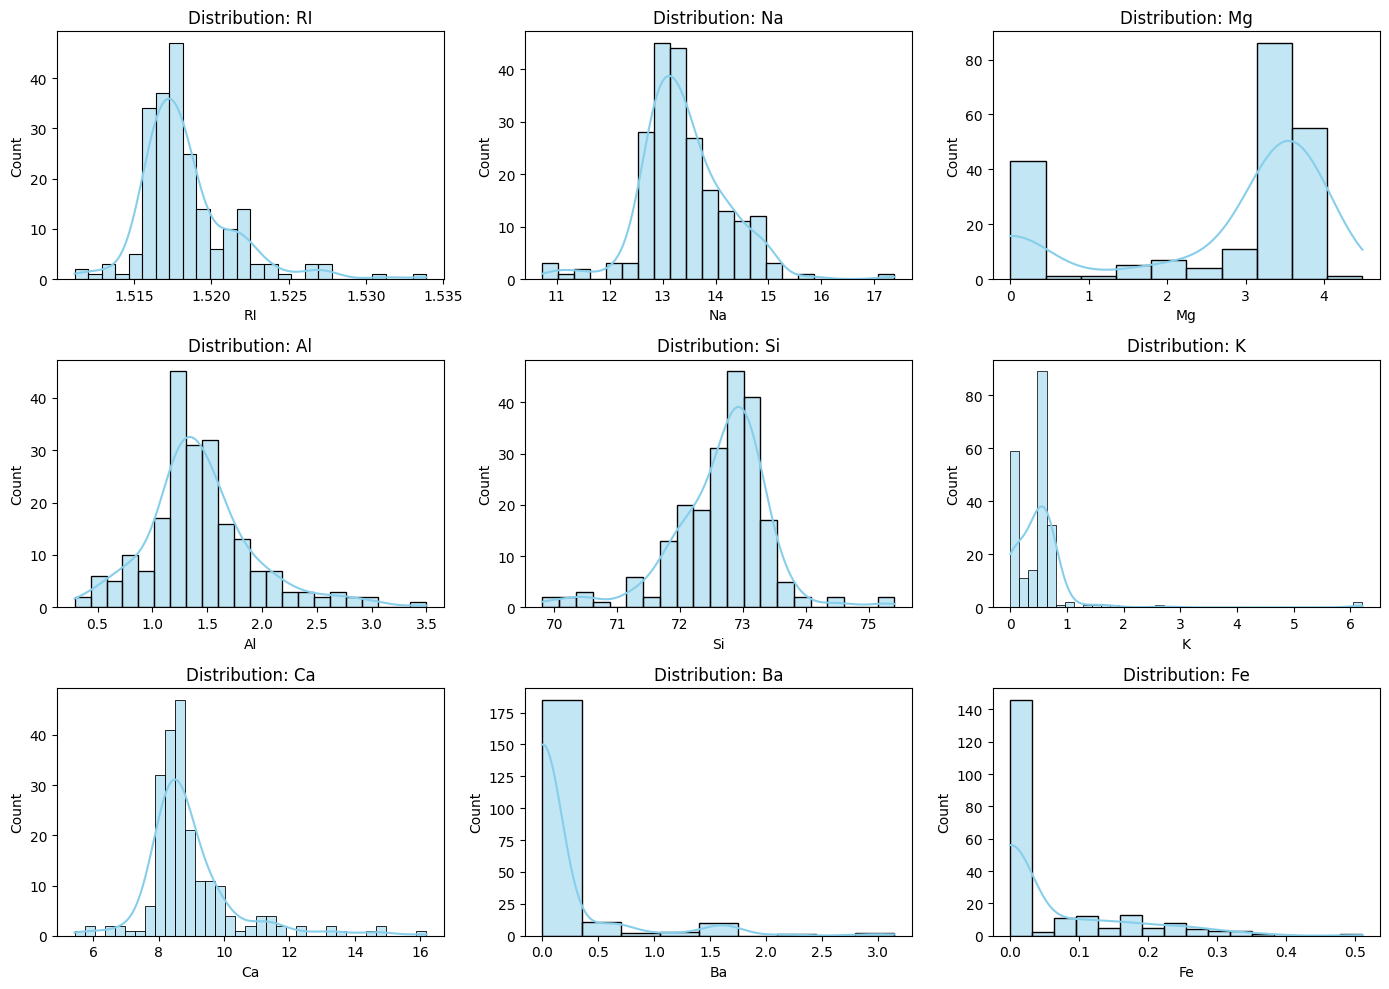

In [20]:
# STEP 3: Visualize Feature Distribution
plt.figure(figsize=(14, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution: {col}')
plt.tight_layout()
plt.show()

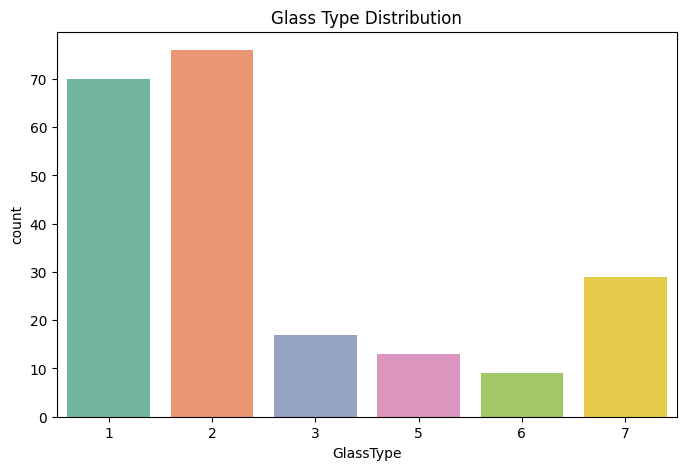

In [21]:
# STEP 4: Class Imbalance
plt.figure(figsize=(8, 5))
sns.countplot(x='GlassType', data=df, palette='Set2')
plt.title("Glass Type Distribution")
plt.show()

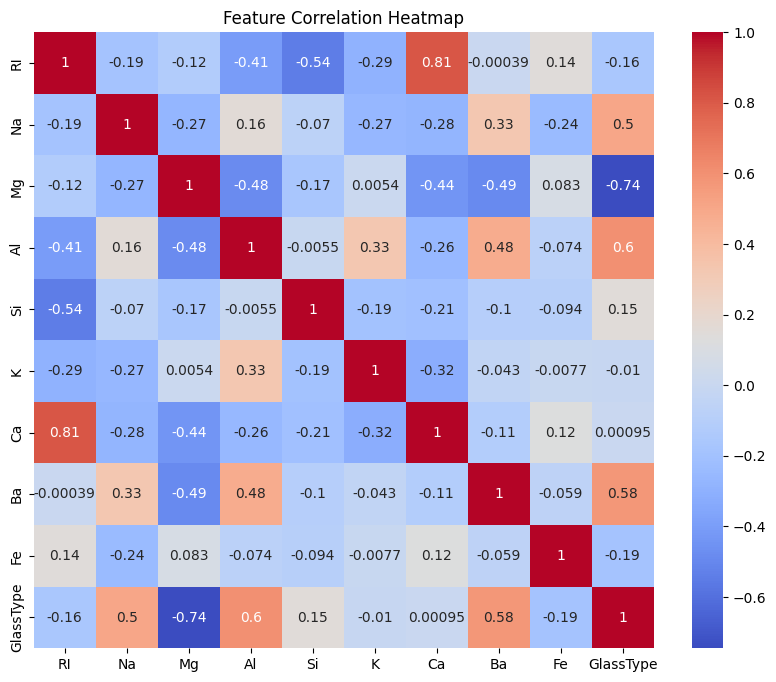

In [22]:
# STEP 5: Correlation Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [23]:
# STEP 6: Data Preprocessing
X = df.drop('GlassType', axis=1)
y = df['GlassType']

In [24]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_encoded)

In [40]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

In [41]:
# STEP 7: Model Building
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(probability=True),
    'XGBoost': XGBClassifier(eval_metric='mlogloss')
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

    print(f"\n📊 Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


📊 Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.69      0.73      0.71        15
           1       0.83      0.33      0.48        15
           2       0.70      0.93      0.80        15
           3       0.89      1.00      0.94        16
           4       0.94      1.00      0.97        16
           5       0.93      0.93      0.93        15

    accuracy                           0.83        92
   macro avg       0.83      0.82      0.81        92
weighted avg       0.83      0.83      0.81        92

Confusion Matrix:
[[11  1  3  0  0  0]
 [ 4  5  3  2  0  1]
 [ 1  0 14  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0  0  0  0 16  0]
 [ 0  0  0  0  1 14]]

📊 Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        15
           1       0.79      0.73      0.76        15
           2       0.93      0.93      0.93        15


🔍 Model Performance Summary:
                 Model  Accuracy  Precision    Recall  F1 Score
2        Random Forest  0.913043   0.916606  0.913043  0.913957
1        Decision Tree  0.869565   0.867875  0.869565  0.868418
0  Logistic Regression  0.826087   0.832539  0.826087  0.808283
3                  KNN  0.793478   0.800027  0.793478  0.790681
4                  SVM  0.782609   0.784398  0.782609  0.782486


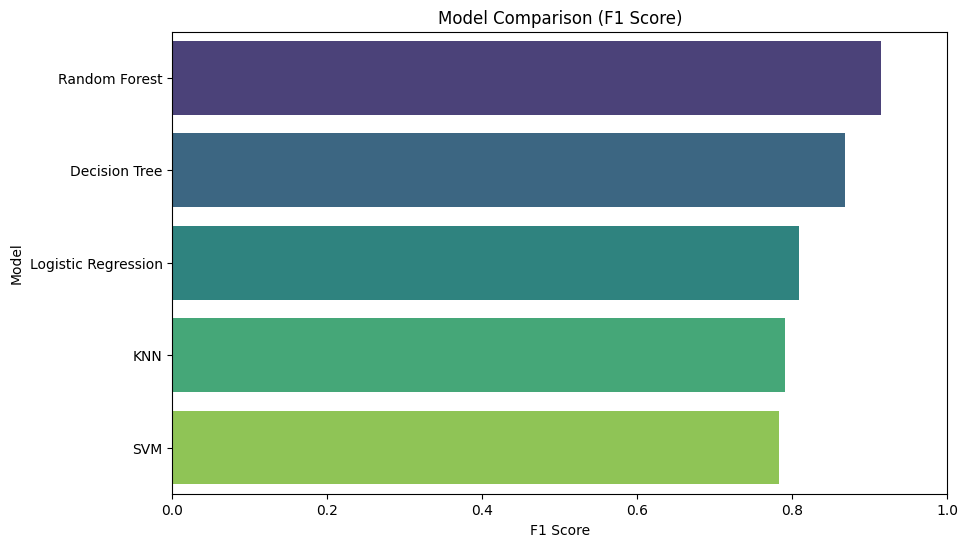

In [34]:
# STEP 8: Evaluation Summary
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='F1 Score', ascending=False)

print("\n🔍 Model Performance Summary:")
print(results_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='F1 Score', y='Model', data=results_df, palette='viridis')
plt.title("Model Comparison (F1 Score)")
plt.xlabel("F1 Score")
plt.ylabel("Model")
plt.xlim(0, 1)
plt.show()


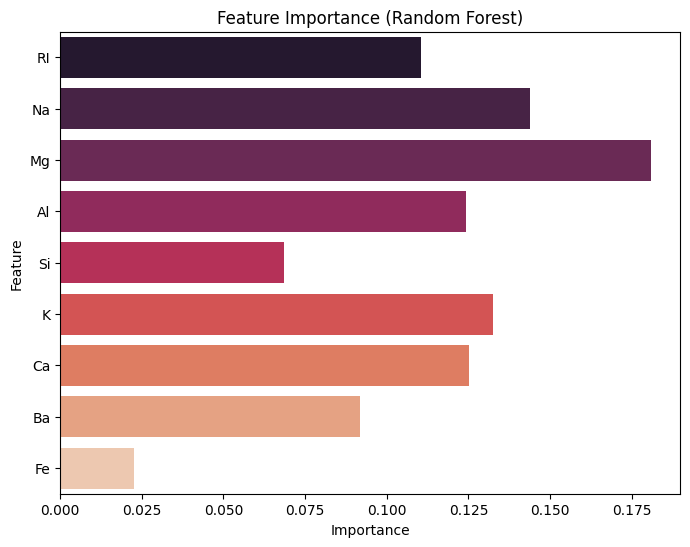

In [35]:
# STEP 9: Feature Importance (Using Random Forest)
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_

plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=df.columns[:-1], palette='rocket')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [36]:
# STEP 10: Final Report Summary
best_model = results_df.iloc[0]['Model']
print(f"\n✅ Best Performing Model: {best_model}")
print("🔍 Key Findings:")
print("- Class imbalance was addressed using SMOTE.")
print("- Features like Ca, RI, and Al showed strong correlation with the target.")
print("- Ensemble models like Random Forest and XGBoost generally performed better.")
print("- t-SNE/PCA can be added for dimensionality visualizations if needed.")


✅ Best Performing Model: Random Forest
🔍 Key Findings:
- Class imbalance was addressed using SMOTE.
- Features like Ca, RI, and Al showed strong correlation with the target.
- Ensemble models like Random Forest and XGBoost generally performed better.
- t-SNE/PCA can be added for dimensionality visualizations if needed.
